In [2]:
import itertools
from pathlib import Path

import numpy as np

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.image as mimage
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import matplotlib.offsetbox as moffsetbox
import matplotlib.text as mtext

from scipy.stats import dirichlet
from mpltern.datasets import get_dirichlet_pdfs, get_triangular_grid

import papercolors as pc
from papercolors import colordict as pcd

mpl.rcParams['font.family'] = 'dejavu sans'
mpl.rcParams['figure.dpi'] = 300
fs={'normal': 10, 'small':9, 'footnote':8, 'script':7, 'tiny':5, 'heading':12}
paper_path = Path('../figures/')

In [3]:
mpl.rc("pgf", texsystem = "pdflatex", preamble = "\n".join(
    [r"\usepackage{inputenc}", 
     r"\usepackage[T1]{fontenc}",
     r"\usepackage{cmbright}",
     r'\usepackage{{amsmath}}', 
    ]))

In [4]:
mosaic = np.array([[r'$\tau$',r'$K$', r'$S$', r'$\rho$'],
                  [r'$\hat{\phi}^*_{E}\tau$', r'$K^{\prime}$', r'$S^{\prime}$', r'$\hat{\phi}^*_{H}\rho$'], 
                  [r'$\tilde{\phi}_{E}\hat{\phi}^*_{E}\tau$', '.', '.', r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$']])
rotation = 30
per_subplot_kw = { r'$\rho$': {'projection':'ternary'},  r'$\hat{\phi}^*_{H}\rho$': {'projection': 'ternary', 'rotation':30}, 
                   r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$':{'projection': 'ternary', 'rotation':30}}

Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown font: dejavu sans
Ignoring unknown fon

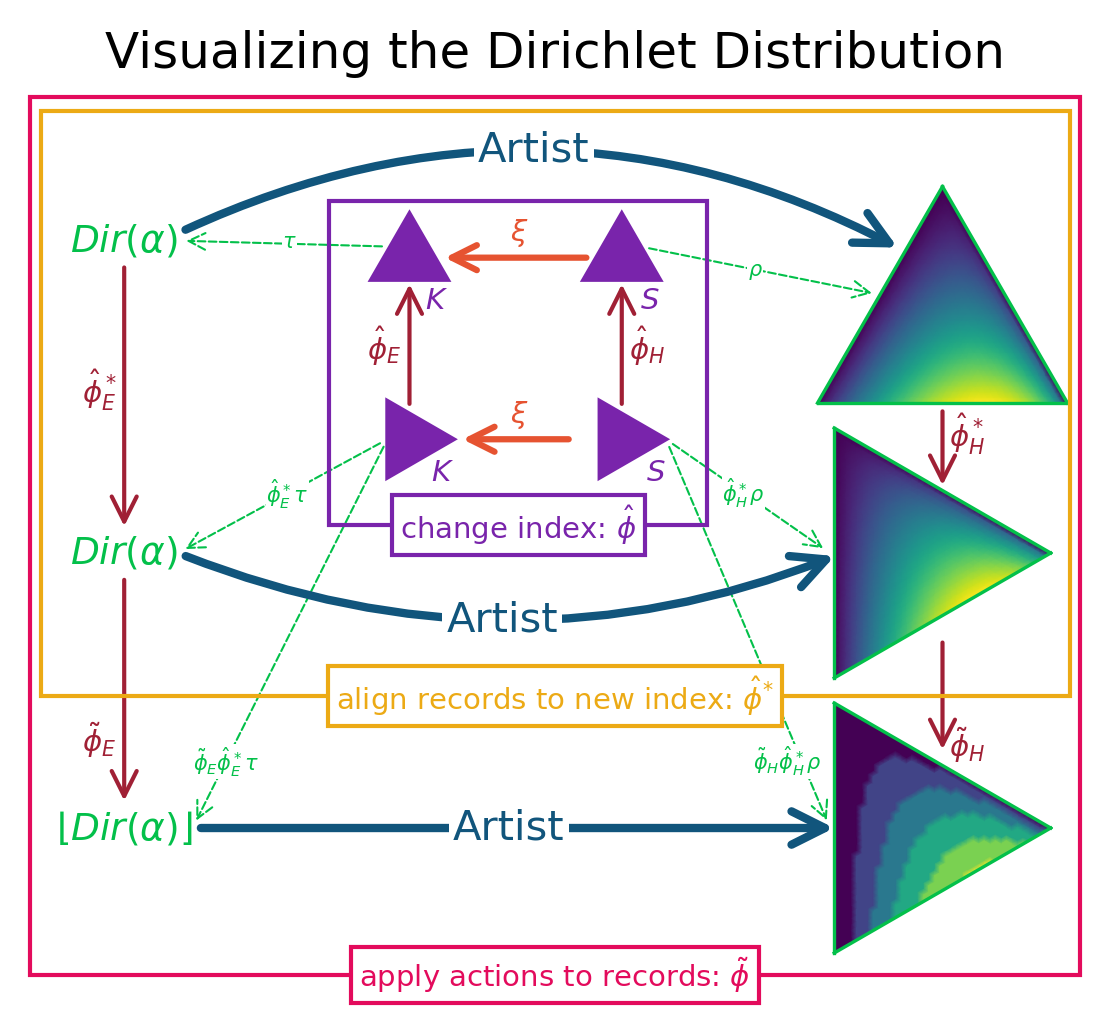

In [5]:
fig, axd = plt.subplot_mosaic(mosaic, figsize=(3.5, 3), layout='compressed', 
                              per_subplot_kw = per_subplot_kw)
for t, ax in axd.items():
    #ax.text(.5, .5, t, transform=ax.transAxes, color=pcd['monoid'], alpha=.25, size=25, ha='center', va='center')
    ax.set(xticks=[], yticks=[], aspect='equal')
    #ax.set_title(t, color=pcd['monoid'])
    ax.axis('off')

for an in per_subplot_kw:
    axd[an].taxis.set_ticks([])
    axd[an].laxis.set_ticks([])
    axd[an].raxis.set_ticks([])
    axd[an].axis('on')

    
alpha = (1, 1.5, 2)
rv = dirichlet(alpha)
t, l, r = get_triangular_grid(n=40)
v = [rv.pdf((ti, li, ri)) for ti, li, ri in zip(t, l, r)]

cmap = plt.get_cmap("viridis")
shading = "gouraud"

cs1 = axd[r'$\rho$'].tripcolor(t, l, r, v, cmap=cmap, shading=shading, rasterized=True)
cs2 = axd[r'$\hat{\phi}^*_{H}\rho$'].tripcolor(t, l, r, v, cmap=cmap, shading=shading, rasterized=True)

cs3 = axd[ r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$'].tripcolor(t, l, r, np.floor(v), cmap=cmap, shading=shading, rasterized=True)

for an in [l for l in axd if l.endswith('rho$')]:
    #axd[an].annotate(an, xy=(0, -.1), xycoords=axd[an].transAxes, va='top', ha='left', color=pcd['section'], fontsize=fs['script'])
    axd[an].spines[:].set_edgecolor(pcd['section'])
    

xt = .3
t1 = axd[r'$\tau$'].text(xt, .75, r"$Dir(\alpha)$", transform=axd[r'$\tau$'].transAxes, 
                         fontsize=fs['small'], va='center', ha='center', color=pcd['section'])

t2 = axd[r'$\hat{\phi}^*_{E}\tau$'].text(xt, .5, r"$Dir(\alpha)$", transform=axd[r'$\hat{\phi}^*_{E}\tau$'].transAxes, 
                                         fontsize=fs['small'], va='center', ha='center', color=pcd['section'])
#
t3 = axd[r'$\tilde{\phi}_{E}\hat{\phi}^*_{E}\tau$'].text(xt, .5, r"$\lfloor Dir(\alpha)\rfloor$", 
                                         transform=axd[r'$\tilde{\phi}_{E}\hat{\phi}^*_{E}\tau$'].transAxes, 
                                                         fontsize=fs['small'], va='center', ha='center', color=pcd['section'])




#phi_s 
e = mosaic[:,0]
h = mosaic[:,-1]

arrowprops = dict(arrowstyle="->", color=pcd['action'], mutation_scale=15, lw=1, zorder=-5)
for tail, head, lab in [(t1, t2, r"$\hat{\phi}^*_{E}$"), (t2, t3, r"$\tilde{\phi}_{E}$"), 
                        (axd[h[0]], axd[h[1]], r"$\hat{\phi}^*_{H}$"), (axd[h[1]], axd[h[2]],r"$\tilde{\phi}_{H}$")]:
    if lab.endswith('{H}$'):
        if 'tilde' not in lab:
            yt, yh = (0, .775) 
        else:
            yt, yh = (.125, .825 )
    else: # tail, head
        yt, yh = (0, 1)
    
    #arr =  mpatches.ConnectionPatch(xyA = (.5, ya), xyB = (.5, yb), 
    #                           coordsA = axd[tail].transAxes, axesA=axd[tail], 
    #                           coordsB = axd[head].transAxes, axesB=axd[head], 
    #                               arrowstyle="->", color=pcd['monoid'], mutation_scale=15, lw=1, zorder=-5)

    arr = mtext.Annotation("", xy = (.5, yh), xytext=(.5, yt), xycoords=head, textcoords=tail, arrowprops=arrowprops, zorder=-10)

    fig.add_artist(arr)
    
    offsetbox = moffsetbox.TextArea(lab, textprops=dict( color=pcd['action'], fontsize=fs['script']))
    xoff = -.5 if lab.endswith('{E}$') else 1.5 

    if lab.endswith('E}$'):
        yoff = .5 if not 'tilde' in lab else .25
    else:    
        yoff = .6 if not 'tilde' in lab else 0  
    ab1 = moffsetbox.AnnotationBbox(offsetbox, (xoff, yoff), xybox=(0, 0), xycoords=arr,
                                     boxcoords="offset points", bboxprops=dict(boxstyle=None, edgecolor='none', facecolor='none'), pad=.1)
    fig.add_artist(ab1)

b = mosaic[0:-1,1:-1]

for an in b.flatten():
    axd[an].margins(.5)
    axd[an].set_aspect('equal')
    #axd[an].axis('off')  


base_dict = {}

for tail, head, lab in [(b[1,0], b[0,0], r"$\hat{\phi}_{E}$"), (b[1,1], b[0,1], r"$\hat{\phi}_{H}$")]:

    tri = mpatches.RegularPolygon(xy=(.5, .5), numVertices=3, radius=.25, color=pcd['base'], transform = axd[head].transAxes)
    axd[head].add_patch(tri)
    axd[head].axis('off')

    base_dict[head] = tri
    
    trir = mpatches.RegularPolygon(xy=(.5, .5), numVertices=3, radius=.25, color=pcd['base'], transform=axd[tail].transAxes,
                                   orientation=np.pi/6)
    axd[tail].add_patch(trir)
    axd[tail].axis('off')
    base_dict[tail] = trir
    
    arr =  mpatches.ConnectionPatch(xyA = (.5, .7), xyB = (.5, .35), 
                               coordsA = axd[tail].transAxes, axesA=axd[tail], 
                               coordsB = axd[head].transAxes, axesB=axd[head], 
                               arrowstyle="->", color=pcd['action'], mutation_scale=15, lw=1, zorder=-5)
    fig.add_artist(arr)
    
    offsetbox = moffsetbox.TextArea(lab, textprops=dict( color=pcd['action'], fontsize=fs['script']))
    off = -.5 if lab.endswith('{E}$') else 1.5
    ab1 = moffsetbox.AnnotationBbox(offsetbox, (off, .5), xybox=(0, 0), xycoords=arr,
                                     boxcoords="offset points", bboxprops=dict(boxstyle=None, edgecolor='none', facecolor='none'), pad=.1)
    fig.add_artist(ab1)

    xoffset = .05
    for axbase, offset, trig, yan in [(head, .08, tri, -.1), (tail, 0.15, trir, .25)]:
        box = axd[axbase].get_position()
        box.y0 = box.y0 + offset
        box.y1 = box.y1 + offset
        box.x0 = box.x0 - xoffset
        box.x1 = box.x1 - xoffset
        #box.x1 = box.x0
        axd[axbase].set_position(box)
        axd[axbase].annotate(axbase.replace('^{\\prime}',''), xy=(1,yan), xycoords=trig, va='top', ha='right', color=pcd['base'], fontsize=fs['script'])

#mosaic = np.array([[r'$\tau$',r'$K$', r'$S$', r'$\rho$'],
#                  [r'$\hat{\phi}^*_{E}\tau$', r'$K^{\prime}$', r'$S^{\prime}$', r'$\hat{\phi}^*_{H}\rho$'], 
#                  [r'$\tilde{\phi}_{E}\hat{\phi}^*_{E}\tau$', '.', '.', r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$']])
#tail, head
sections = [('$K$', t1, r"$\tau$", .25, 1), 
            (r'$K^{\prime}$', t2, r'$\hat{\phi}^*_{E}\tau$', 0, 1), 
            (r'$K^{\prime}$', t3,r'$\tilde{\phi}_{E}\hat{\phi}^*_{E}\tau$', 0, 1), 
            ('$S$', axd[r"$\rho$"], r"$\rho$", .75, .25), 
            (r'$S^{\prime}$', axd[r'$\hat{\phi}^*_{H}\rho$'], r'$\hat{\phi}^*_{H}\rho$', 1, .05), 
            (r'$S^{\prime}$', axd[r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$'],r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$', 1, .05)]


arrowprops=dict(arrowstyle="->", ls='--', color=pcd['section'], mutation_scale=10, lw=.5)
for (tail, head, label, xt, xh) in sections:
    
    arr = mtext.Annotation("", (xh,.5), xytext=(xt, .5), xycoords=head, textcoords=base_dict[tail], arrowprops=arrowprops, zorder=-20)
    fig.add_artist(arr)

    if 'tilde' in label:
        xy = (.15, .15) if "K" in tail else (.75, .15)
    else:
        xy = (.5, .5)        
    
    lab = mtext.Annotation(label, xy, xycoords=arr, color=pcd['section'], va='center', ha='center',  
                               bbox=dict(boxstyle=None, edgecolor='none', facecolor='white', pad=.1), fontsize=fs['script']-2)
    fig.add_artist(lab)


for tail, head, (xa, xb) in [(b[0,1], b[0,0], (.3, .7)), (b[1,1], b[1,0], (.2, .8))]:
    arr =  mpatches.ConnectionPatch(xyA = (xa, .5), xyB = (xb, .5), 
                               coordsA = axd[tail].transAxes, axesA=axd[tail], 
                               coordsB = axd[head].transAxes, axesB=axd[head], 
                               arrowstyle="->", color=pcd['functor'], mutation_scale=15, lw=1.5, zorder=5)
    fig.add_artist(arr)
    
    offsetbox = moffsetbox.TextArea(r"$\xi$", textprops=dict( color=pcd['functor'], fontsize=fs['script']))
    
    ab1 = moffsetbox.AnnotationBbox(offsetbox, (.5, 1.5), xybox=(0, 0), xycoords=arr,
                                     boxcoords="offset points", bboxprops=dict(boxstyle=None, edgecolor='none', facecolor='none'), pad=.1)
    fig.add_artist(ab1)

# arrows: annotate: tail, head, tail=text, xy=head
#artists
artist_arrow = [(1, r'$\rho$', t1, 
                 dict(arrowstyle="->", color=pcd['artist'], connectionstyle='arc3, rad=-.25', mutation_scale=20, lw=2)),
                (0, r'$\hat{\phi}^*_{H}\rho$', t2, 
                 dict(arrowstyle="->", color=pcd['artist'], connectionstyle='arc3, rad=.2', mutation_scale=20, lw=2)), 
                (.5, r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$', t3, 
                 dict(arrowstyle="->", color=pcd['artist'], mutation_scale=20, lw=2))]

for y, xycoords, textcoords, arrowprops in artist_arrow:
    rx = .1 if y <1 else .35
    ry = .5 if y < 1 else .7
    a = mtext.Annotation("", (rx,ry), xytext=(1, ry), xycoords=axd[xycoords], textcoords=textcoords, arrowprops=arrowprops, zorder=-10)
    fig.add_artist(a)

    offsetbox = moffsetbox.TextArea("Artist", textprops=dict( color=pcd['artist']))
    
    ab1 = moffsetbox.AnnotationBbox(offsetbox, (.5, y), xybox=(0, 0), xycoords=a,
                                     boxcoords="offset points", bboxprops=dict(boxstyle=None, edgecolor='none'), pad=.1)
    fig.add_artist(ab1)


bframe = mpatches.Rectangle(xy= (.285, .55), height=.36, width=.36, facecolor='none', edgecolor=pcd['base'], transform=fig.transFigure)
fig.add_artist(bframe)

offsetbox = moffsetbox.TextArea(r"change index: $\hat{\phi}$", 
                                textprops=dict( color=pcd['base'], fontsize=fs['script']))
    
ab1 = moffsetbox.AnnotationBbox(offsetbox, (.5, 0), xybox=(0, 0), xycoords=bframe,
                                     boxcoords="offset points", 
                                bboxprops=dict(boxstyle=None, edgecolor=pcd['base'], facecolor='white'), pad=.2)
fig.add_artist(ab1)

sframe = mpatches.Rectangle(xy=(.01, .36), height=.65, width=.98, facecolor='none', edgecolor=pcd['sheaf'], transform=fig.transFigure)
fig.add_artist(sframe)
offsetbox = moffsetbox.TextArea(r"align records to new index: $\hat{\phi}^{*}$", textprops=dict( color=pcd['sheaf'], fontsize=fs['script']))
    
ab1 = moffsetbox.AnnotationBbox(offsetbox, (.5, 0), xybox=(0, 0), xycoords=sframe,
                                     boxcoords="offset points", 
                                bboxprops=dict(boxstyle=None, edgecolor=pcd['sheaf'], facecolor='white'), pad=.2)
fig.add_artist(ab1)


rframe = mpatches.Rectangle(xy=(0, 0.05), height=.975, width=1, facecolor='none', edgecolor=pcd['fiber'], transform=fig.transFigure)
fig.add_artist(rframe)
offsetbox = moffsetbox.TextArea(r"apply actions to records: $\tilde{\phi}$", textprops=dict( color=pcd['fiber'], fontsize=fs['script']))
    
ab1 = moffsetbox.AnnotationBbox(offsetbox, (.5, 0), xybox=(0, 0), xycoords=rframe,
                                     boxcoords="offset points", 
                                bboxprops=dict(boxstyle=None, edgecolor=pcd['fiber'], facecolor='white'), pad=.2)
fig.add_artist(ab1)


fig.suptitle('Visualizing the Dirichlet Distribution', y=1.1)
fig.savefig(paper_path/'artist_equiv.pdf', bbox_inches='tight', backend='pgf')    
#fig.savefig(paper_path/'artist_equiv.png', bbox_inches='tight')

In [5]:
base_dict.keys()

dict_keys([np.str_('$K$'), np.str_('$K^{\\prime}$'), np.str_('$S$'), np.str_('$S^{\\prime}$')])

In [357]:
axbase.replace('^{\\prime}','')

'$S$'

In [ ]:
x